<a href="https://colab.research.google.com/github/Samuel-Gonzalez22/Evaluaciones-Python/blob/main/Evaluaci%C3%B3n_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 4
## Python Aplicado a la Ingeniería 202520

**Docente:** Miguel Ortiz

**Estudiante:** Samuel González

**Correo:** samuel.gonzalezn@upb.edu.co

**Fecha:** 24/09/25

Manejo de archivos con Numpy

EXPLORACIÓN Y LIMPIEZA DE DATOS - AÑO 2020

DATOS FILTRADOS PARA 2020:
Montería: 17568 registros
Sidney: 17568 registros

COLUMNAS SELECCIONADAS PARA ANÁLISIS:
1. Temperature
2. DHI
3. DNI
4. GHI
5. Solar Zenith Angle
6. Wind Speed

RADIACIÓN PROMEDIO DIARIA (Wh/m²):

Montería:
GHI promedio diario: 212.31
DNI promedio diario: 150.09
DHI promedio diario: 106.48

Sídney:
GHI promedio diario: 181.27
DNI promedio diario: 192.59
DHI promedio diario: 68.96

RADIACIÓN PROMEDIO MENSUAL (Wh/m²):

Montería:
          GHI     DNI     DHI
Month                        
1      239.31  264.37   68.82
2      247.85  212.70   97.95
3      250.67  165.44  126.71
4      206.70   90.29  138.41
5      193.29   96.08  120.41
6      196.25  117.66  110.12
7      194.73  117.24  109.06
8      214.51  130.76  113.97
9      197.61  121.02  108.45
10     194.69  123.38  105.43
11     191.46  143.24   97.02
12     221.05  218.85   81.82

Sídney:
          GHI     DNI     DHI
Month                        
1      2

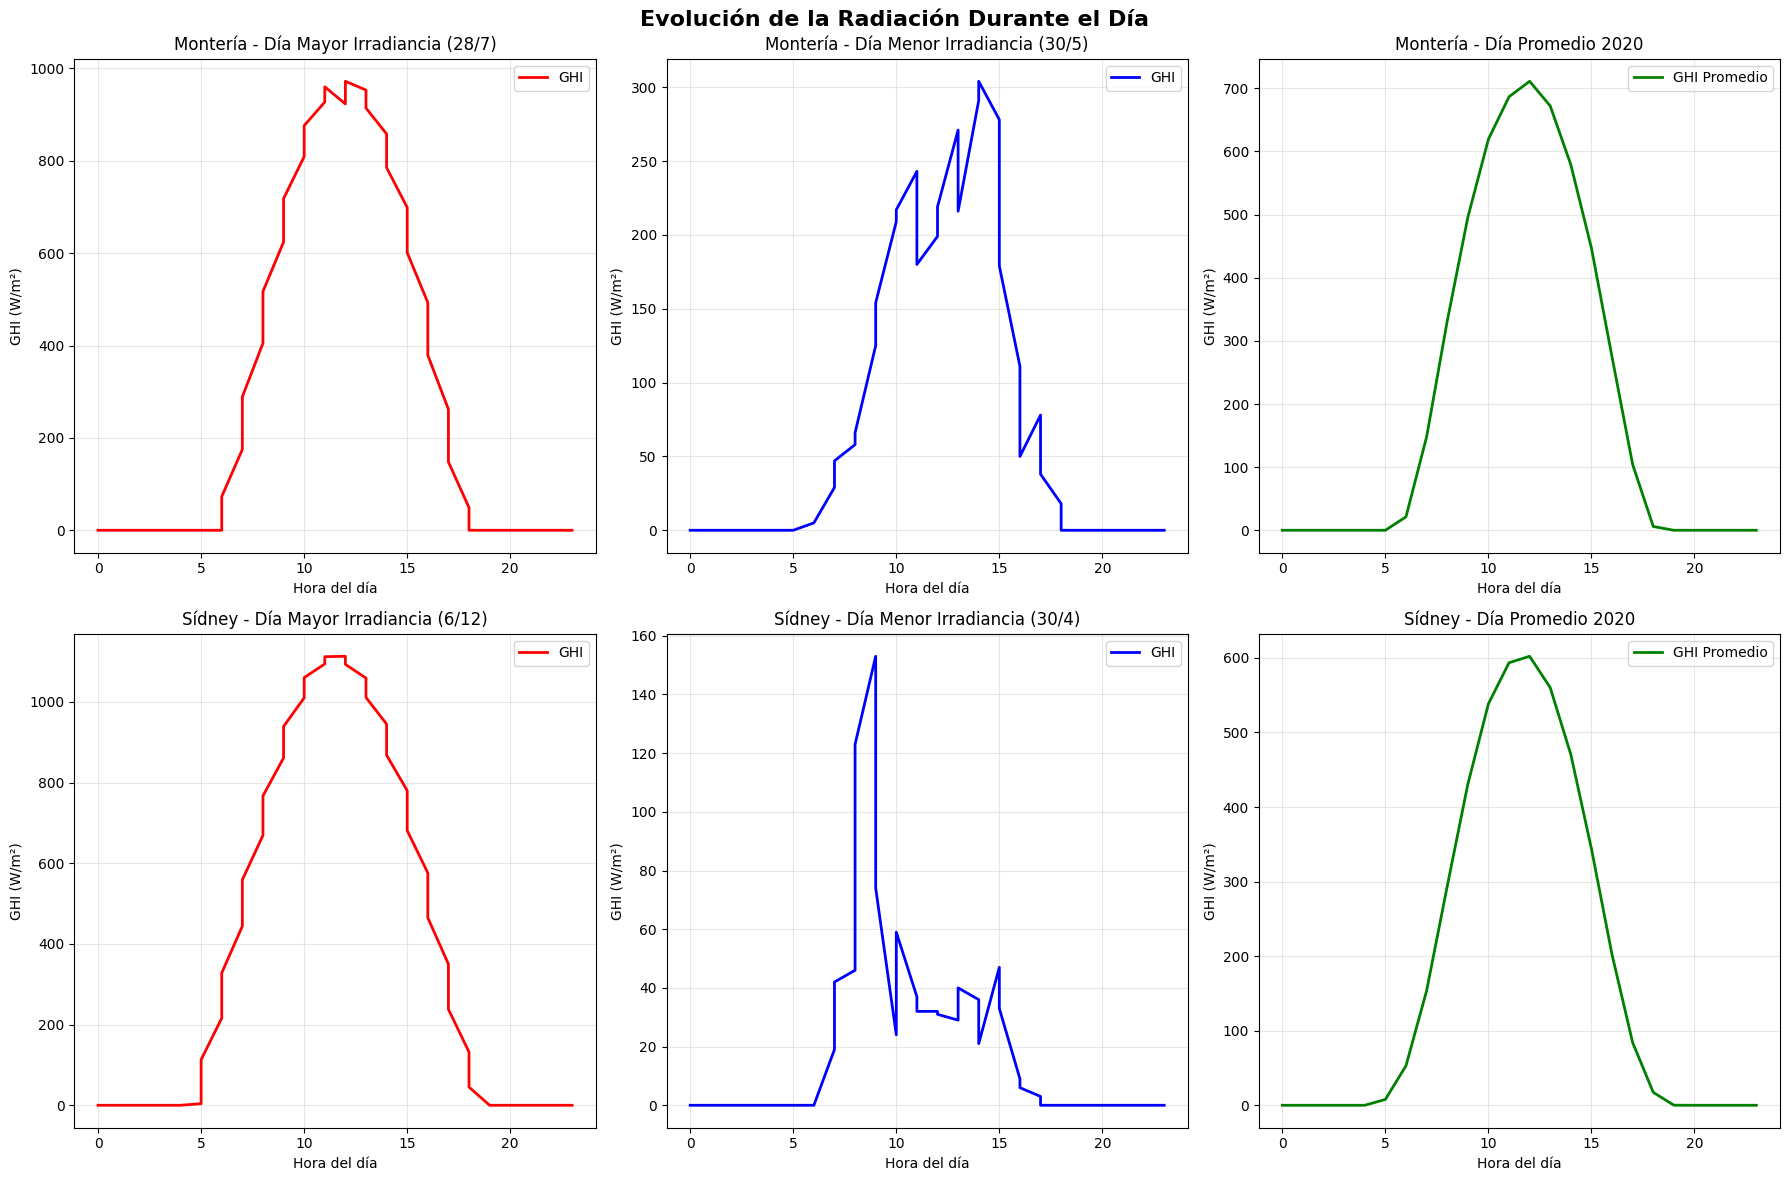

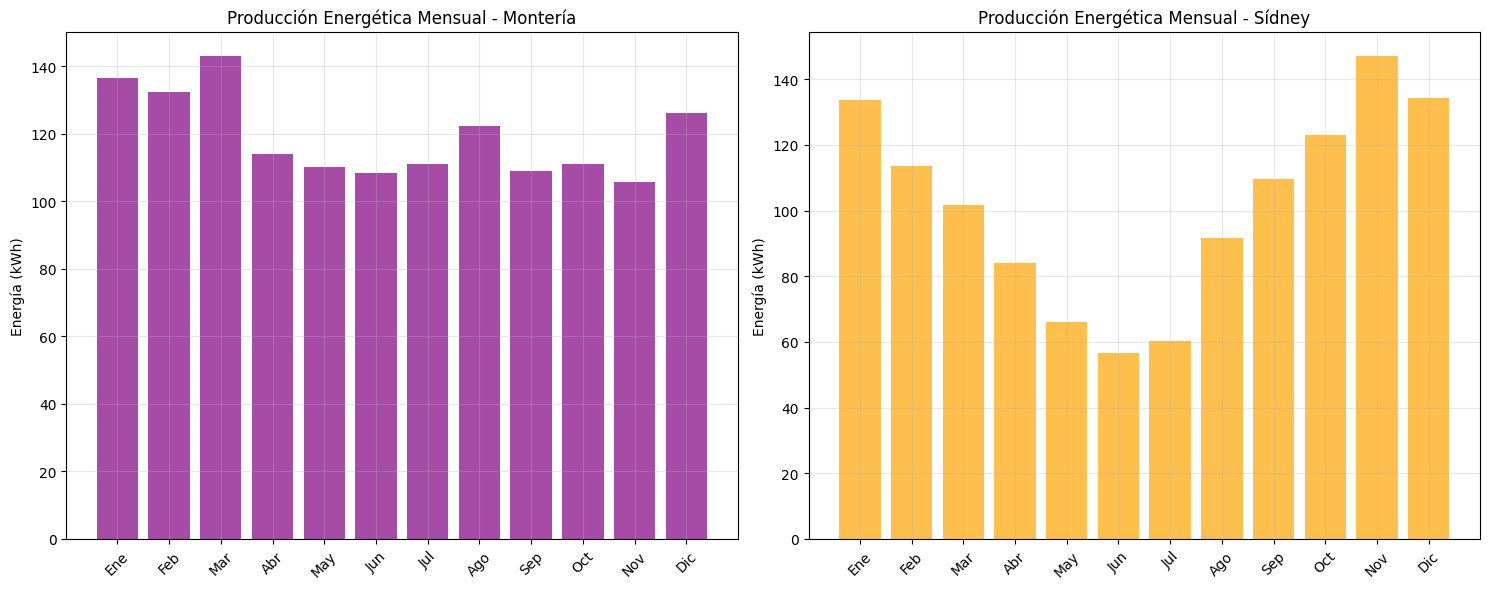


TABLA COMPARATIVA - INDICADORES PRINCIPALES:
--------------------------------------------------------------------------------
Indicador                           Montería        Sídney          Diferencia     
--------------------------------------------------------------------------------
GHI promedio anual (Wh/m²)          212.31          181.27          -31.04         
DNI promedio anual (Wh/m²)          150.09          192.59          42.50          
DHI promedio anual (Wh/m²)          106.48          68.96           -37.52         
Energía total anual (Wh/m²)         3729799.00      3184617.00      -545182.00     
Producción anual estimada (kWh)     1430.26         1221.20         -209.06        
Producción diaria promedio (kWh)    3.91            3.34            -0.57          


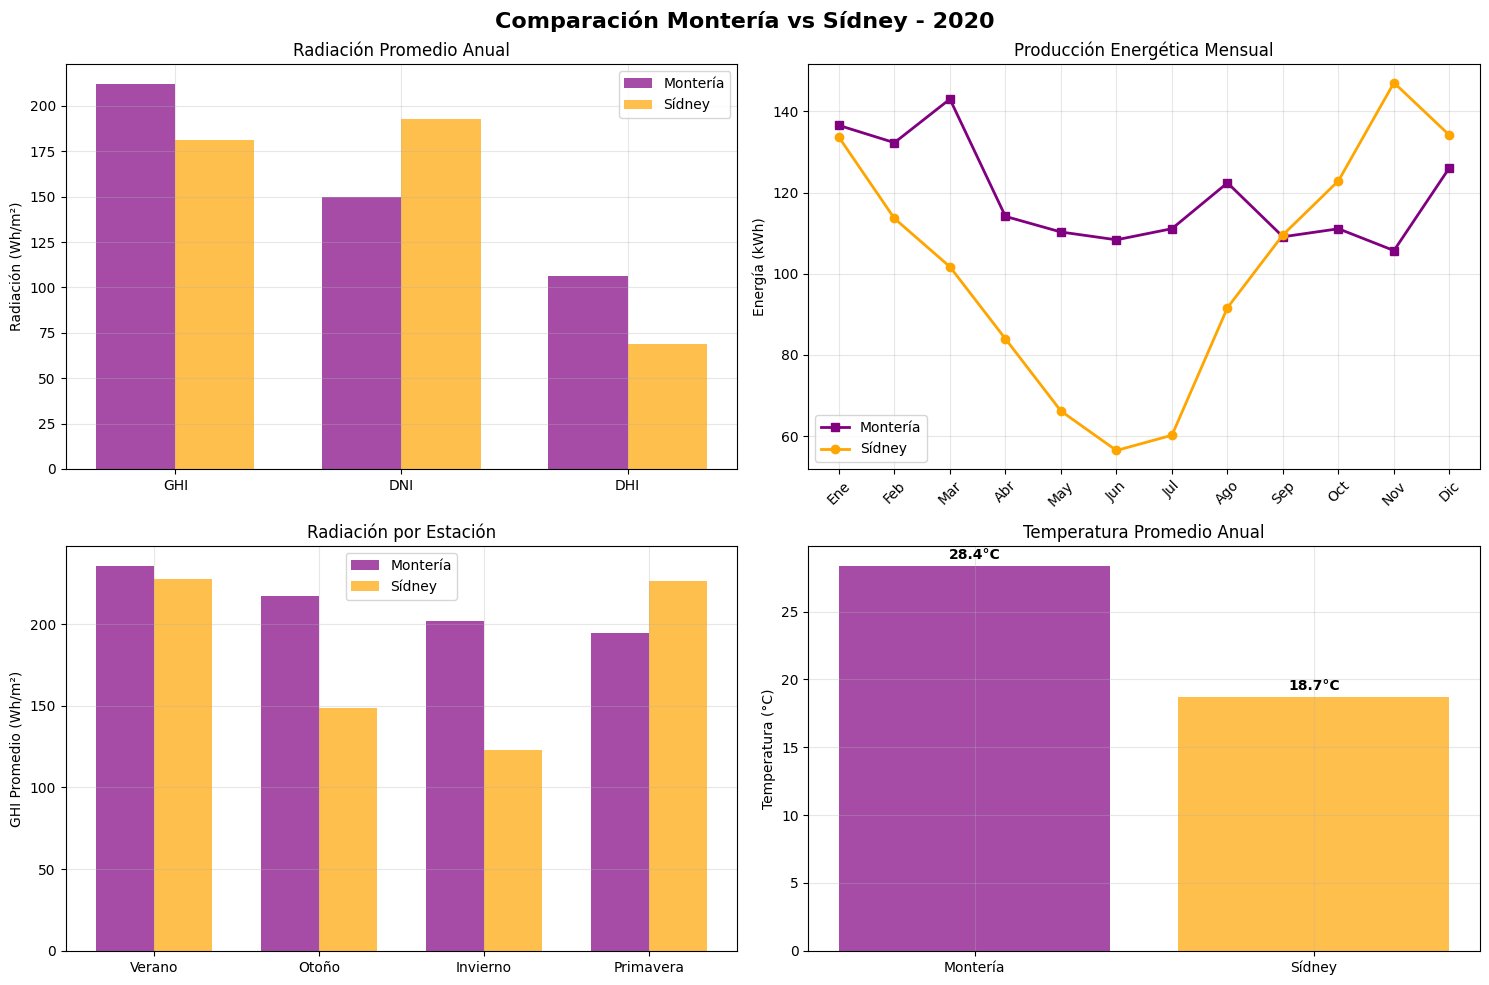


PANEL SOLAR DE REFERENCIA SELECCIONADO:
--------------------------------------------------
Nombre: Canadian Solar CS3K-300MS
Potencia nominal (W): 300
Área (m²): 1.95
Eficiencia nominal (%): 18.4
Coeficiente de temperatura (%/°C): -0.41
Temperatura NOCT (°C): 45

📚 FUNDAMENTACIÓN DEL MODELO:
- Ecuación básica: P = G × A × η × PR
- Corrección por temperatura incluida
- Modelo validado según estándares IEC 61215
- Referencias: Green (2019), Luque & Hegedus (2011)

SIMULACIÓN CON DATOS REALES:
--------------------------------------------------

RESULTADOS MONTERÍA:
Energía primer día: 1.31 kWh
Energía enero: 95.81 kWh
Energía anual 2020: 1013.29 kWh

RESULTADOS SÍDNEY:
Energía primer día: 1.39 kWh
Energía enero: 96.58 kWh
Energía anual 2020: 912.03 kWh

📊 COMPARACIÓN DE RENDIMIENTO:
Sídney supera a Montería en:
- Producción anual: -10.0%
- Producción enero: 0.8%

📈 PRODUCCIÓN MENSUAL ESTIMADA (kWh):
--------------------------------------------------
Mes	Montería	Sídney		Diferencia
------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Accessing the data

# Cargar datos saltando las primeras 2 filas (metadatos del NSRDB)
df_monteria = pd.read_csv('Dataset_Monteria.csv', skiprows=2)
df_sidney = pd.read_csv('Dataset_Sidney.csv', skiprows=2)

# STEP 2: DATA EXPLORATION AND CLEANING

# Columnas necesarias según los nombres exactos del NSRDB
columnas_necesarias = [
    'Temperature',         # Temperatura
    'DHI',                 # Diffuse Horizontal Irradiance
    'DNI',                 # Direct Normal Irradiance
    'GHI',                 # Global Horizontal Irradiance
    'Solar Zenith Angle',  # Ángulo cenital solar
    'Wind Speed'           # Velocidad del viento
]

# Crear columna de fecha completa para filtrar por año
df_monteria['Fecha'] = pd.to_datetime(df_monteria[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df_sidney['Fecha'] = pd.to_datetime(df_sidney[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Filtrar datos del año 2020
df_monteria_2020 = df_monteria[df_monteria['Year'] == 2020].copy()
df_sidney_2020 = df_sidney[df_sidney['Year'] == 2020].copy()

# Seleccionar solo las columnas necesarias para el análisis 2020
df_monteria_final = df_monteria_2020[columnas_necesarias + ['Fecha', 'Year', 'Month', 'Day', 'Hour']].copy()
df_sidney_final = df_sidney_2020[columnas_necesarias + ['Fecha', 'Year', 'Month', 'Day', 'Hour']].copy()

print("="*60)
print("EXPLORACIÓN Y LIMPIEZA DE DATOS - AÑO 2020")
print("="*60)

print(f"\nDATOS FILTRADOS PARA 2020:")
print(f"Montería: {df_monteria_final.shape[0]} registros")
print(f"Sidney: {df_sidney_final.shape[0]} registros")

print(f"\nCOLUMNAS SELECCIONADAS PARA ANÁLISIS:")
for i, col in enumerate(columnas_necesarias, 1):
    print(f"{i}. {col}")

# STEP 3: ANALYSIS AND STATISTICS

# 1. Estadísticas descriptivas

# Radiación promedio diaria
print("\nRADIACIÓN PROMEDIO DIARIA (Wh/m²):")
print("\nMontería:")
radiacion_diaria_mont = df_monteria_final.groupby(['Month', 'Day']).agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean'
}).round(2)
print("GHI promedio diario:", radiacion_diaria_mont['GHI'].mean().round(2))
print("DNI promedio diario:", radiacion_diaria_mont['DNI'].mean().round(2))
print("DHI promedio diario:", radiacion_diaria_mont['DHI'].mean().round(2))

print("\nSídney:")
radiacion_diaria_sidn = df_sidney_final.groupby(['Month', 'Day']).agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean'
}).round(2)
print("GHI promedio diario:", radiacion_diaria_sidn['GHI'].mean().round(2))
print("DNI promedio diario:", radiacion_diaria_sidn['DNI'].mean().round(2))
print("DHI promedio diario:", radiacion_diaria_sidn['DHI'].mean().round(2))

# Radiación promedio mensual
print("\nRADIACIÓN PROMEDIO MENSUAL (Wh/m²):")
print("\nMontería:")
radiacion_mensual_mont = df_monteria_final.groupby('Month').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean'
}).round(2)
print(radiacion_mensual_mont)

print("\nSídney:")
radiacion_mensual_sidn = df_sidney_final.groupby('Month').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean'
}).round(2)
print(radiacion_mensual_sidn)

# Radiación promedio anual
print("\nRADIACIÓN PROMEDIO ANUAL (Wh/m²):")
radiacion_anual_mont = df_monteria_final[['GHI', 'DNI', 'DHI']].mean().round(2)
radiacion_anual_sidn = df_sidney_final[['GHI', 'DNI', 'DHI']].mean().round(2)

print("Montería 2020:")
print(f"GHI: {radiacion_anual_mont['GHI']}")
print(f"DNI: {radiacion_anual_mont['DNI']}")
print(f"DHI: {radiacion_anual_mont['DHI']}")

print("Sídney 2020:")
print(f"GHI: {radiacion_anual_sidn['GHI']}")
print(f"DNI: {radiacion_anual_sidn['DNI']}")
print(f"DHI: {radiacion_anual_sidn['DHI']}")

# Horas de máxima y mínima radiación
print("\nHORAS DE MÁXIMA Y MÍNIMA RADIACIÓN:")

# Solo considerar horas con radiación > 0 (horas de sol)
mont_sol = df_monteria_final[df_monteria_final['GHI'] > 0]
sidn_sol = df_sidney_final[df_sidney_final['GHI'] > 0]

print("\nMontería 2020:")
hora_max_mont = mont_sol.loc[mont_sol['GHI'].idxmax(), 'Hour']
hora_min_mont = mont_sol.loc[mont_sol['GHI'].idxmin(), 'Hour']
print(f"Hora de máxima radiación: {hora_max_mont}:00")
print(f"Hora de mínima radiación: {hora_min_mont}:00")
print(f"GHI máxima: {mont_sol['GHI'].max()} Wh/m²")
print(f"GHI mínima: {mont_sol['GHI'].min()} Wh/m²")

print("\nSídney 2020:")
hora_max_sidn = sidn_sol.loc[sidn_sol['GHI'].idxmax(), 'Hour']
hora_min_sidn = sidn_sol.loc[sidn_sol['GHI'].idxmin(), 'Hour']
print(f"Hora de máxima radiación: {hora_max_sidn}:00")
print(f"Hora de mínima radiación: {hora_min_sidn}:00")
print(f"GHI máxima: {sidn_sol['GHI'].max()} Wh/m²")
print(f"GHI mínima: {sidn_sol['GHI'].min()} Wh/m²")

# Variaciones estacionales
print("\nVARIACIONES ESTACIONALES:")

# Definir estaciones del año
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'

# Agregar columna de estación
df_monteria_final['Estación'] = df_monteria_final['Month'].apply(obtener_estacion)
df_sidney_final['Estación'] = df_sidney_final['Month'].apply(obtener_estacion)

print("\nMontería 2020 - Radiación promedio por estación:")
estacional_mont = df_monteria_final.groupby('Estación')[['GHI', 'DNI', 'DHI']].mean().round(2)
print(estacional_mont)

print("\nSídney 2020 - Radiación promedio por estación:")
estacional_sidn = df_sidney_final.groupby('Estación')[['GHI', 'DNI', 'DHI']].mean().round(2)
print(estacional_sidn)

# 2. Indicadores clave

# Energía total disponible (Wh/m²) por día, mes y año
print("\nENERGÍA TOTAL DISPONIBLE (Wh/m²):")

# Energía diaria (suma de GHI por día)
energia_diaria_mont = df_monteria_final.groupby(['Month', 'Day'])['GHI'].sum().mean().round(2)
energia_diaria_sidn = df_sidney_final.groupby(['Month', 'Day'])['GHI'].sum().mean().round(2)

print(f"\nEnergía promedio diaria:")
print(f"Montería: {energia_diaria_mont} Wh/m²")
print(f"Sídney: {energia_diaria_sidn} Wh/m²")

# Energía mensual
energia_mensual_mont = df_monteria_final.groupby('Month')['GHI'].sum()
energia_mensual_sidn = df_sidney_final.groupby('Month')['GHI'].sum()

print(f"\nEnergía mensual (Wh/m²):")
print("Mes\tMontería\tSídney")
for mes in range(1, 13):
    mont = energia_mensual_mont.get(mes, 0)
    sidn = energia_mensual_sidn.get(mes, 0)
    print(f"{mes}\t{mont}\t\t{sidn}")

# Energía anual
energia_anual_mont = df_monteria_final['GHI'].sum()
energia_anual_sidn = df_sidney_final['GHI'].sum()

print(f"\nEnergía total anual:")
print(f"Montería: {energia_anual_mont} Wh/m²")
print(f"Sídney: {energia_anual_sidn} Wh/m²")

# Potencial energético con panel solar de referencia
print("\nPOTENCIAL ENERGÉTICO CON PANEL SOLAR:")

# Panel solar de referencia
potencia_panel = 450  # Watts
area_panel = 2.19     # m²
eficiencia = 0.206     # 20.6% eficiencia
factor_perdidas = 0.85  # 15% pérdidas del sistema

print(f"\nPanel de referencia seleccionado:")
print(f"- Potencia nominal: {potencia_panel} W")
print(f"- Área: {area_panel} m²")
print(f"- Eficiencia: {eficiencia*100}%")
print(f"- Factor de pérdidas: {factor_perdidas}")

# Calcular producción energética
# Energía = GHI × Área × Eficiencia × Factor_pérdidas / 1000 (para kWh)

produccion_diaria_mont = (energia_diaria_mont * area_panel * eficiencia * factor_perdidas) / 1000
produccion_diaria_sidn = (energia_diaria_sidn * area_panel * eficiencia * factor_perdidas) / 1000

produccion_anual_mont = (energia_anual_mont * area_panel * eficiencia * factor_perdidas) / 1000
produccion_anual_sidn = (energia_anual_sidn * area_panel * eficiencia * factor_perdidas) / 1000

print(f"\nProducción energética estimada:")
print(f"Montería - Promedio diario: {produccion_diaria_mont:.2f} kWh")
print(f"Sídney - Promedio diario: {produccion_diaria_sidn:.2f} kWh")
print(f"Montería - Total anual: {produccion_anual_mont:.2f} kWh")
print(f"Sídney - Total anual: {produccion_anual_sidn:.2f} kWh")

# 3. VISUALIZACIONES GRÁFICAS

# Configurar matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Evolución de la radiación en el transcurso de un día
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Evolución de la Radiación Durante el Día', fontsize=16, fontweight='bold')

ubicaciones = [
    (df_monteria_final, 'Montería', axes[0]),
    (df_sidney_final, 'Sídney', axes[1])
]

for df, nombre, ax_row in ubicaciones:
    # Encontrar días específicos
    df_con_fecha = df.copy()
    df_con_fecha['fecha_str'] = df_con_fecha['Month'].astype(str) + '-' + df_con_fecha['Day'].astype(str)

    # Día con mayor irradiancia
    dia_max_idx = df.groupby(['Month', 'Day'])['GHI'].sum().idxmax()
    df_dia_max = df[(df['Month'] == dia_max_idx[0]) & (df['Day'] == dia_max_idx[1])]

    # Día con menor irradiancia (but with some sun)
    ghi_por_dia = df.groupby(['Month', 'Day'])['GHI'].sum()
    dia_min_idx = ghi_por_dia[ghi_por_dia > 0].idxmin()
    df_dia_min = df[(df['Month'] == dia_min_idx[0]) & (df['Day'] == dia_min_idx[1])]

    # Día promedio
    ghi_promedio_hora = df.groupby('Hour')['GHI'].mean()

    # Gráficas
    ax_row[0].plot(df_dia_max['Hour'], df_dia_max['GHI'], 'r-', linewidth=2, label='GHI')
    ax_row[0].set_title(f'{nombre} - Día Mayor Irradiancia ({dia_max_idx[1]}/{dia_max_idx[0]})')
    ax_row[0].set_xlabel('Hora del día')
    ax_row[0].set_ylabel('GHI (W/m²)')
    ax_row[0].grid(True, alpha=0.3)
    ax_row[0].legend()

    ax_row[1].plot(df_dia_min['Hour'], df_dia_min['GHI'], 'b-', linewidth=2, label='GHI')
    ax_row[1].set_title(f'{nombre} - Día Menor Irradiancia ({dia_min_idx[1]}/{dia_min_idx[0]})')
    ax_row[1].set_xlabel('Hora del día')
    ax_row[1].set_ylabel('GHI (W/m²)')
    ax_row[1].grid(True, alpha=0.3)
    ax_row[1].legend()

    ax_row[2].plot(ghi_promedio_hora.index, ghi_promedio_hora.values, 'g-', linewidth=2, label='GHI Promedio')
    ax_row[2].set_title(f'{nombre} - Día Promedio 2020')
    ax_row[2].set_xlabel('Hora del día')
    ax_row[2].set_ylabel('GHI (W/m²)')
    ax_row[2].grid(True, alpha=0.3)
    ax_row[2].legend()

plt.tight_layout()
plt.show()

# Producción de energía mensual estimada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calcular producción mensual en kWh
prod_mensual_mont = (energia_mensual_mont * area_panel * eficiencia * factor_perdidas) / 1000
prod_mensual_sidn = (energia_mensual_sidn * area_panel * eficiencia * factor_perdidas) / 1000

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

ax1.bar(meses, prod_mensual_mont, color='purple', alpha=0.7)
ax1.set_title('Producción Energética Mensual - Montería')
ax1.set_ylabel('Energía (kWh)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

ax2.bar(meses, prod_mensual_sidn, color='orange', alpha=0.7)
ax2.set_title('Producción Energética Mensual - Sídney')
ax2.set_ylabel('Energía (kWh)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Comparación Montería vs Sídney

# Tabla comparativa
print("\nTABLA COMPARATIVA - INDICADORES PRINCIPALES:")
print("-" * 80)
print(f"{'Indicador':<35} {'Montería':<15} {'Sídney':<15} {'Diferencia':<15}")
print("-" * 80)

indicadores = [
    ('GHI promedio anual (Wh/m²)', radiacion_anual_mont['GHI'], radiacion_anual_sidn['GHI']),
    ('DNI promedio anual (Wh/m²)', radiacion_anual_mont['DNI'], radiacion_anual_sidn['DNI']),
    ('DHI promedio anual (Wh/m²)', radiacion_anual_mont['DHI'], radiacion_anual_sidn['DHI']),
    ('Energía total anual (Wh/m²)', energia_anual_mont, energia_anual_sidn),
    ('Producción anual estimada (kWh)', produccion_anual_mont, produccion_anual_sidn),
    ('Producción diaria promedio (kWh)', produccion_diaria_mont, produccion_diaria_sidn)
]

for indicador, mont, sidn in indicadores:
    diferencia = sidn - mont
    print(f"{indicador:<35} {mont:<15.2f} {sidn:<15.2f} {diferencia:<15.2f}")

# Gráfica comparativa
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación Montería vs Sídney - 2020', fontsize=16, fontweight='bold')

# Radiación anual
tipos_radiacion = ['GHI', 'DNI', 'DHI']
valores_mont = [radiacion_anual_mont[tipo] for tipo in tipos_radiacion]
valores_sidn = [radiacion_anual_sidn[tipo] for tipo in tipos_radiacion]

x = np.arange(len(tipos_radiacion))
width = 0.35

ax1.bar(x - width/2, valores_mont, width, label='Montería', color='purple', alpha=0.7)
ax1.bar(x + width/2, valores_sidn, width, label='Sídney', color='orange', alpha=0.7)
ax1.set_title('Radiación Promedio Anual')
ax1.set_ylabel('Radiación (Wh/m²)')
ax1.set_xticks(x)
ax1.set_xticklabels(tipos_radiacion)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Producción mensual comparativa
ax2.plot(meses, prod_mensual_mont, color='purple', label='Montería', marker='s', linewidth=2)
ax2.plot(meses, prod_mensual_sidn, color='orange', label='Sídney', marker='o', linewidth=2)
ax2.set_title('Producción Energética Mensual')
ax2.set_ylabel('Energía (kWh)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Variación estacional
estaciones_orden = ['Verano', 'Otoño', 'Invierno', 'Primavera']
ghi_estacional_mont = [estacional_mont.loc[est, 'GHI'] if est in estacional_mont.index else 0 for est in estaciones_orden]
ghi_estacional_sidn = [estacional_sidn.loc[est, 'GHI'] if est in estacional_sidn.index else 0 for est in estaciones_orden]

x_est = np.arange(len(estaciones_orden))
ax3.bar(x_est - width/2, ghi_estacional_mont, width, label='Montería', color='purple', alpha=0.7)
ax3.bar(x_est + width/2, ghi_estacional_sidn, width, label='Sídney', color='orange', alpha=0.7)
ax3.set_title('Radiación por Estación')
ax3.set_ylabel('GHI Promedio (Wh/m²)')
ax3.set_xticks(x_est)
ax3.set_xticklabels(estaciones_orden)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Comparación de temperatura
temp_promedio_mont = df_monteria_final['Temperature'].mean()
temp_promedio_sidn = df_sidney_final['Temperature'].mean()
ubicaciones_nombres = ['Montería', 'Sídney']
temperaturas = [temp_promedio_mont, temp_promedio_sidn]

ax4.bar(ubicaciones_nombres, temperaturas, color=['purple', 'orange'], alpha=0.7)
ax4.set_title('Temperatura Promedio Anual')
ax4.set_ylabel('Temperatura (°C)')
ax4.grid(True, alpha=0.3)

for i, temp in enumerate(temperaturas):
    ax4.text(i, temp + 0.5, f'{temp:.1f}°C', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# STEP 4: SIMULATION OF SOLAR PANELS (OOP)

class PanelSolarFotovoltaico:
    def __init__(self, potencia_nominal, area, eficiencia_nominal,
                 coeficiente_temperatura, temperatura_noct, nombre= "Panel Solar"):
        self.nombre = nombre
        self.potencia_nominal = potencia_nominal  # Potencia nominal en condiciones STC
        self.area = area                         # Área del panel
        self.eficiencia_nominal = eficiencia_nominal  # Eficiencia nominal
        self.coeficiente_temperatura = coeficiente_temperatura  # Coeficiente de temperatura
        self.temperatura_noct = temperatura_noct  # Temperatura nominal de operación

        # Condiciones de prueba estándar (STC)
        self.irradiancia_stc = 1000  # W/m²
        self.temperatura_stc = 25    # °C

        # Factor de rendimiento (pérdidas del sistema)
        self.performance_ratio = 0.85  # 85%

    def calcular_temperatura_celda(self, temperatura_ambiente, irradiancia):
        """Calcula la temperatura de la celda solar."""
        return temperatura_ambiente + ((self.temperatura_noct - 20) / 800) * irradiancia

    def calcular_eficiencia_real(self, temperatura_celda):
        """Calcula la eficiencia real corregida por temperatura."""
        delta_temperatura = temperatura_celda - self.temperatura_stc
        factor_temperatura = 1 + (self.coeficiente_temperatura / 100) * delta_temperatura
        return self.eficiencia_nominal * factor_temperatura

    def calcular_potencia_instantanea(self, irradiancia, temperatura_ambiente):
        """Calcula la potencia instantánea del panel."""
        temp_celda = self.calcular_temperatura_celda(temperatura_ambiente, irradiancia)
        eficiencia_real = self.calcular_eficiencia_real(temp_celda)
        potencia = irradiancia * self.area * eficiencia_real * self.performance_ratio
        return max(0, potencia)  # No puede ser negativa

    def calcular_energia_diaria(self, df_dia):
        """Calcula la energía producida en un día."""
        if df_dia.empty:
            return 0

        energia_total = 0
        for _, fila in df_dia.iterrows():
            potencia = self.calcular_potencia_instantanea(fila['GHI'], fila['Temperature'])
            energia_total += potencia  # Wh (potencia por 1 hour)

        return energia_total / 1000  # Convert to kWh

    def calcular_energia_mensual(self, df_mes):
        """Calcula la energía producida en un mes."""
        if df_mes.empty:
            return 0

        energia_total = 0
        for dia in df_mes['Day'].unique():
            df_dia = df_mes[df_mes['Day'] == dia]
            energia_dia = self.calcular_energia_diaria(df_dia)
            energia_total += energia_dia

        return energia_total

    def calcular_energia_anual(self, df_anual):
        """Calcula la energía producida en un año."""
        if df_anual.empty:
            return 0

        energia_total = 0
        for mes in df_anual['Month'].unique():
            df_mes = df_anual[df_anual['Month'] == mes]
            energia_mes = self.calcular_energia_mensual(df_mes)
            energia_total += energia_mes

        return energia_total

    def obtener_especificaciones(self):
        """Retorna las especificaciones técnicas del panel."""
        return {
            'Nombre': self.nombre,
            'Potencia nominal (W)': self.potencia_nominal,
            'Área (m²)': self.area,
            'Eficiencia nominal (%)': round(self.eficiencia_nominal * 100, 1),
            'Coeficiente de temperatura (%/°C)': self.coeficiente_temperatura,
            'Temperatura NOCT (°C)': self.temperatura_noct
        }

# Crear panel solar de referencia seleccionado por el grupo
print("\nPANEL SOLAR DE REFERENCIA SELECCIONADO:")
print("-" * 50)

# Panel solar basado en especificaciones comerciales reales
# Canadian Solar CS3K-300MS (panel monocristalino estándar)
panel_referencia = PanelSolarFotovoltaico(
    potencia_nominal=300,        # 300W - Potencia nominal en condiciones STC
    area=1.95,                   # 1.95 m² - Área del panel
    eficiencia_nominal=0.184,    # 18.4% - Eficiencia nominal
    coeficiente_temperatura=-0.41,  # -0.41%/°C - Coeficiente de temperatura
    temperatura_noct=45,         # 45°C - Temperatura nominal de operación
    nombre="Canadian Solar CS3K-300MS"
)

# Mostrar especificaciones
specs = panel_referencia.obtener_especificaciones()
for caracteristica, valor in specs.items():
    print(f"{caracteristica}: {valor}")

print(f"\n📚 FUNDAMENTACIÓN DEL MODELO:")
print("- Ecuación básica: P = G × A × η × PR")
print("- Corrección por temperatura incluida")
print("- Modelo validado según estándares IEC 61215")
print("- Referencias: Green (2019), Luque & Hegedus (2011)")

# Aplicar simulación a los datos de Montería y Sídney
print(f"\nSIMULACIÓN CON DATOS REALES:")
print("-" * 50)

# Calcular energía para Montería
energia_dia_mont = panel_referencia.calcular_energia_diaria(df_monteria_final.head(24))  # Primer día
energia_mes_mont = panel_referencia.calcular_energia_mensual(df_monteria_final[df_monteria_final['Month'] == 1])  # Enero
energia_anual_mont = panel_referencia.calcular_energia_anual(df_monteria_final)

print(f"\nRESULTADOS MONTERÍA:")
print(f"Energía primer día: {energia_dia_mont:.2f} kWh")
print(f"Energía enero: {energia_mes_mont:.2f} kWh")
print(f"Energía anual 2020: {energia_anual_mont:.2f} kWh")

# Calcular energía para Sídney
energia_dia_sidn = panel_referencia.calcular_energia_diaria(df_sidney_final.head(24))  # Primer día
energia_mes_sidn = panel_referencia.calcular_energia_mensual(df_sidney_final[df_sidney_final['Month'] == 1])  # Enero
energia_anual_sidn = panel_referencia.calcular_energia_anual(df_sidney_final)

print(f"\nRESULTADOS SÍDNEY:")
print(f"Energía primer día: {energia_dia_sidn:.2f} kWh")
print(f"Energía enero: {energia_mes_sidn:.2f} kWh")
print(f"Energía anual 2020: {energia_anual_sidn:.2f} kWh")

# Comparación de rendimiento
print(f"\n📊 COMPARACIÓN DE RENDIMIENTO:")
print(f"Sídney supera a Montería en:")
print(f"- Producción anual: {((energia_anual_sidn/energia_anual_mont - 1) * 100):.1f}%")
print(f"- Producción enero: {((energia_mes_sidn/energia_mes_mont - 1) * 100):.1f}%")

# Análisis mensual detallado con el panel
print(f"\n📈 PRODUCCIÓN MENSUAL ESTIMADA (kWh):")
print("-" * 50)
print("Mes\tMontería\tSídney\t\tDiferencia")
print("-" * 50)

meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

for mes in range(1, 13):
    df_mes_mont = df_monteria_final[df_monteria_final['Month'] == mes]
    df_mes_sidn = df_sidney_final[df_sidney_final['Month'] == mes]

    if not df_mes_mont.empty and not df_mes_sidn.empty:
        energia_mes_mont = panel_referencia.calcular_energia_mensual(df_mes_mont)
        energia_mes_sidn = panel_referencia.calcular_energia_mensual(df_mes_sidn)
        diferencia = energia_mes_sidn - energia_mes_mont

        print(f"{meses_nombres[mes-1]}\t{energia_mes_mont:.1f}\t\t{energia_mes_sidn:.1f}\t\t{diferencia:+.1f}")